# Scikit-learn - Random forest

## Prepare the dataset

First of all, import classical data packages: pandas and numpy.

In [0]:
# Pandas is used for data manipulation
import pandas as pd
# Numpy is used for calculation
import numpy as np
# Matplotlib is used for plots
import matplotlib.pyplot as plt
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

Get the dataset on this [link](https://drive.google.com/file/d/1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1/view); read it the dataset and explore it a little bit. Get the number of rows and columns and the main statistic indicators from the variables.

In [0]:
dataset = pd.read_csv('Weather.csv')

In [12]:
print('The shape of the data is:', dataset.shape)

The shape of the data is: (119040, 31)


In [13]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


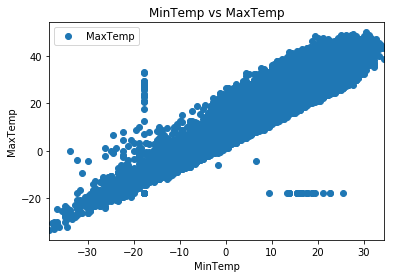

In [14]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

NameError: ignored

<Figure size 1080x720 with 0 Axes>

In [16]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,:].head(5)

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE,Date_1940-1-1,Date_1940-1-10,Date_1940-1-11,Date_1940-1-12,Date_1940-1-13,Date_1940-1-14,Date_1940-1-15,Date_1940-1-16,Date_1940-1-17,Date_1940-1-18,Date_1940-1-19,Date_1940-1-2,Date_1940-1-20,Date_1940-1-21,Date_1940-1-22,Date_1940-1-23,...,SNF_T,TSHDSBRSGF_1.0,TSHDSBRSGF_0,TSHDSBRSGF_1,TSHDSBRSGF_1 1,TSHDSBRSGF_1 0,TSHDSBRSGF_1 1,TSHDSBRSGF_1 1 1,TSHDSBRSGF_1 1,TSHDSBRSGF_1 1,TSHDSBRSGF_1 1 1,TSHDSBRSGF_1 1 1 1,TSHDSBRSGF_1 1,TSHDSBRSGF_1 0,TSHDSBRSGF_1 0 1,TSHDSBRSGF_1 1,TSHDSBRSGF_1 1 1,TSHDSBRSGF_1000,TSHDSBRSGF_100000,TSHDSBRSGF_1000000,TSHDSBRSGF_1000000000,TSHDSBRSGF_1000001000,TSHDSBRSGF_1000001001,TSHDSBRSGF_100001,TSHDSBRSGF_1000100000,TSHDSBRSGF_1000100001,TSHDSBRSGF_10001001,TSHDSBRSGF_1000101000,TSHDSBRSGF_1000101001,TSHDSBRSGF_1001,TSHDSBRSGF_101000,TSHDSBRSGF_1010001000,TSHDSBRSGF_1010001001,TSHDSBRSGF_101001,TSHDSBRSGF_11,TSHDSBRSGF_11 1,TSHDSBRSGF_11 1,TSHDSBRSGF_1100000,TSHDSBRSGF_1101000,TSHDSBRSGF_1101001
0,10001,NaN,25.555556,22.222222,23.888889,42,7,1,NaN,NaN,78.0,72.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001,NaN,28.888889,21.666667,25.555556,42,7,2,NaN,NaN,84.0,71.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001,NaN,26.111111,22.222222,24.444444,42,7,3,NaN,NaN,79.0,72.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001,NaN,26.666667,22.222222,24.444444,42,7,4,NaN,NaN,80.0,72.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10001,NaN,26.666667,21.666667,24.444444,42,7,5,NaN,NaN,80.0,71.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features; axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

KeyError: ignored

In [0]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [0]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [0]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
# Train the model on training data
rf.fit(train_features, train_labels)

In [0]:
# Calculate the errors from the predictions
errors = abs(test_labels - rf.predict(test_features))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')